<a href="https://colab.research.google.com/github/sabinamunoz/lab-predictions-logistic-regression/blob/master/lab_predictions_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#! pip install imblearn
#! pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import numpy as np
from statistics import mean
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

import warnings
warnings.filterwarnings('default')

In [3]:
def print_full(x, n):
    pd.set_option('display.min_rows', n)
    display(x)
    pd.reset_option('display.min_rows')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/IronHack Bootcamp/UNIT 3/WEEK 8/film_rental_data.csv')
df.head()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

,rented_last_month,rentals_store_1,rentals_store_2,rental_duration,length,rating,trailers,deleted_scenes,behind_scenes
0,0,13,11,6,86,PG,0,1,1
1,1,0,7,3,48,G,1,1,0
2,0,0,12,7,50,NC-17,1,1,0
3,1,13,10,5,117,G,0,0,1
4,1,0,12,6,130,G,0,1,0


In [5]:
for col in df.select_dtypes('object'):
    print(col, 'nulls: ', df[col].isna().sum())
    display(df[col].value_counts())
    print('__________________________________', '\n')


rating nulls:  0


PG-13    213
NC-17    202
R        189
PG       183
G        171
Name: rating, dtype: int64

__________________________________ 



In [6]:
for col in df.select_dtypes('number'):
    print(col, 'nulls: ', df[col].isna().sum())

rented_last_month nulls:  0
rentals_store_1 nulls:  0
rentals_store_2 nulls:  0
rental_duration nulls:  0
length nulls:  0
trailers nulls:  0
deleted_scenes nulls:  0
behind_scenes nulls:  0


In [7]:
y = df['rented_last_month']
X = df.drop('rented_last_month', axis=1)

In [8]:
X = pd.get_dummies(X, columns=X[['rating']].columns.tolist())
X

,rentals_store_1,rentals_store_2,rental_duration,length,trailers,deleted_scenes,behind_scenes,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,13,11,6,86,0,1,1,0,0,1,0,0
1,0,7,3,48,1,1,0,1,0,0,0,0
2,0,12,7,50,1,1,0,0,1,0,0,0
3,13,10,5,117,0,0,1,1,0,0,0,0
4,0,12,6,130,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
953,7,0,6,183,1,0,1,1,0,0,0,0
954,6,0,4,179,1,0,1,0,1,0,0,0
955,0,9,6,105,0,1,0,0,1,0,0,0
956,6,11,5,101,1,1,0,0,0,0,0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
classification = LogisticRegression(random_state=42, max_iter=1000)

classification.fit(X_train, y_train)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


LogisticRegression(max_iter=1000, random_state=42)

0.8611111111111112

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


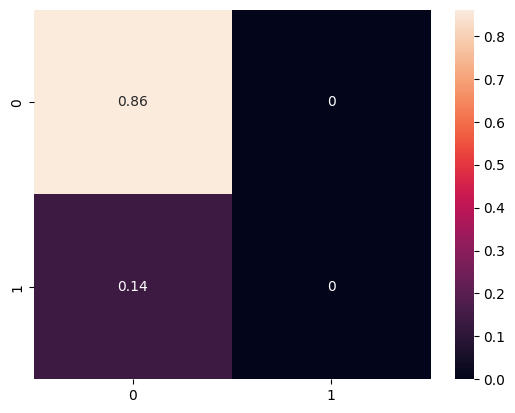

In [11]:
predictions = classification.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=classification.classes_, normalize='all')
sns.heatmap(cm, annot=True, xticklabels=["0", "1"], yticklabels=["0", "1"])
classification.score(X_test, y_test)